In [1]:
import json
import urllib
from urllib.parse import urlparse
import httplib2 as http #External library
import json


if __name__=="__main__":
  headers = { 'AccountKey' : '4KggjzyVR3OEeUDNwejvvw==',
             'accept' : 'application/json'} 
             
  uri = 'http://datamall2.mytransport.sg/'
  path = 'ltaodataservice/TrafficIncidents?'
  target = urlparse(uri + path)
  print (target.geturl())
  method = 'GET'
  body = ''
    
 #Get handle to http
  h = http.Http()
 #Obtain results
  response, content = h.request(
  target.geturl(),
  method,
  body,
  headers)
 #Parse JSON to print
  jsonObj = json.loads(content)
  print (json.dumps(jsonObj, sort_keys=True, indent=4))


http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents
{
    "odata.metadata": "http://datamall2.mytransport.sg/ltaodataservice/$metadata#IncidentSet",
    "value": [
        {
            "Latitude": 1.393886355693116,
            "Longitude": 103.82022268256189,
            "Message": "(3/2)11:43 Accident on SLE (towards BKE) after Upper Thomson Rd Exit.",
            "Type": "Accident"
        },
        {
            "Latitude": 1.3246184777553356,
            "Longitude": 103.89066272738796,
            "Message": "(3/2)12:11 Roadworks on Paya Lebar Road (towards PIE) after Arumugam Road.",
            "Type": "Roadwork"
        },
        {
            "Latitude": 1.2836986478912333,
            "Longitude": 103.84977281920997,
            "Message": "(3/2)12:10 Roadworks on Church Street (towards Cecil Street) after Telok Ayer Street. Avoid right lane.",
            "Type": "Roadwork"
        },
        {
            "Latitude": 1.33275062057769,
            "Longitude

In [2]:
 #Save result to file
 with open("traffic_incidents.json","w") as outfile:
  json.dump(jsonObj, outfile, sort_keys=True, indent=4,ensure_ascii=False)


In [3]:
import csv
import tweepy
import json
import pandas as pd
from pandas.io.json import json_normalize 

In [4]:
df = pd.read_json('traffic_incidents.json')
df.drop(columns='odata.metadata', inplace=True)

In [5]:
df.head()

,value
0,"{'Latitude': 1.393886355693116, 'Longitude': 1..."
1,"{'Latitude': 1.324618477755335, 'Longitude': 1..."
2,"{'Latitude': 1.283698647891233, 'Longitude': 1..."
3,"{'Latitude': 1.33275062057769, 'Longitude': 10..."
4,"{'Latitude': 1.333332163260511, 'Longitude': 1..."


In [6]:
df['value'].dtype

dtype('O')

In [7]:
df = json_normalize(df['value'])
df.head()

,Latitude,Longitude,Message,Type
0,1.393886,103.820223,(3/2)11:43 Accident on SLE (towards BKE) after...,Accident
1,1.324618,103.890663,(3/2)12:11 Roadworks on Paya Lebar Road (towar...,Roadwork
2,1.283699,103.849773,(3/2)12:10 Roadworks on Church Street (towards...,Roadwork
3,1.332751,103.889053,(3/2)12:10 Roadworks on Paya Lebar Road (towar...,Roadwork
4,1.333332,103.887832,(3/2)12:10 Roadworks on Macpherson Road (towar...,Roadwork


In [8]:
df['Text'] = df['Message'].str[10:]
df.head()

,Latitude,Longitude,Message,Type,Text
0,1.393886,103.820223,(3/2)11:43 Accident on SLE (towards BKE) after...,Accident,Accident on SLE (towards BKE) after Upper Tho...
1,1.324618,103.890663,(3/2)12:11 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards PIE) af...
2,1.283699,103.849773,(3/2)12:10 Roadworks on Church Street (towards...,Roadwork,Roadworks on Church Street (towards Cecil Str...
3,1.332751,103.889053,(3/2)12:10 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards Ubi Ave...
4,1.333332,103.887832,(3/2)12:10 Roadworks on Macpherson Road (towar...,Roadwork,Roadworks on Macpherson Road (towards Paya Le...


In [9]:
df['Date'] = df['Message'].str[1:4]
df.head()

,Latitude,Longitude,Message,Type,Text,Date
0,1.393886,103.820223,(3/2)11:43 Accident on SLE (towards BKE) after...,Accident,Accident on SLE (towards BKE) after Upper Tho...,3/2
1,1.324618,103.890663,(3/2)12:11 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards PIE) af...,3/2
2,1.283699,103.849773,(3/2)12:10 Roadworks on Church Street (towards...,Roadwork,Roadworks on Church Street (towards Cecil Str...,3/2
3,1.332751,103.889053,(3/2)12:10 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards Ubi Ave...,3/2
4,1.333332,103.887832,(3/2)12:10 Roadworks on Macpherson Road (towar...,Roadwork,Roadworks on Macpherson Road (towards Paya Le...,3/2


In [10]:
df['Time'] = df['Message'].str[5:10]
df.head()

,Latitude,Longitude,Message,Type,Text,Date,Time
0,1.393886,103.820223,(3/2)11:43 Accident on SLE (towards BKE) after...,Accident,Accident on SLE (towards BKE) after Upper Tho...,3/2,11:43
1,1.324618,103.890663,(3/2)12:11 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards PIE) af...,3/2,12:11
2,1.283699,103.849773,(3/2)12:10 Roadworks on Church Street (towards...,Roadwork,Roadworks on Church Street (towards Cecil Str...,3/2,12:10
3,1.332751,103.889053,(3/2)12:10 Roadworks on Paya Lebar Road (towar...,Roadwork,Roadworks on Paya Lebar Road (towards Ubi Ave...,3/2,12:10
4,1.333332,103.887832,(3/2)12:10 Roadworks on Macpherson Road (towar...,Roadwork,Roadworks on Macpherson Road (towards Paya Le...,3/2,12:10


In [11]:
df.drop(columns='Message', inplace=True)
df.head()

,Latitude,Longitude,Type,Text,Date,Time
0,1.393886,103.820223,Accident,Accident on SLE (towards BKE) after Upper Tho...,3/2,11:43
1,1.324618,103.890663,Roadwork,Roadworks on Paya Lebar Road (towards PIE) af...,3/2,12:11
2,1.283699,103.849773,Roadwork,Roadworks on Church Street (towards Cecil Str...,3/2,12:10
3,1.332751,103.889053,Roadwork,Roadworks on Paya Lebar Road (towards Ubi Ave...,3/2,12:10
4,1.333332,103.887832,Roadwork,Roadworks on Macpherson Road (towards Paya Le...,3/2,12:10


In [12]:
df = df[['Date','Time','Text','Type','Latitude','Longitude']]
df.head()

,Date,Time,Text,Type,Latitude,Longitude
0,3/2,11:43,Accident on SLE (towards BKE) after Upper Tho...,Accident,1.393886,103.820223
1,3/2,12:11,Roadworks on Paya Lebar Road (towards PIE) af...,Roadwork,1.324618,103.890663
2,3/2,12:10,Roadworks on Church Street (towards Cecil Str...,Roadwork,1.283699,103.849773
3,3/2,12:10,Roadworks on Paya Lebar Road (towards Ubi Ave...,Roadwork,1.332751,103.889053
4,3/2,12:10,Roadworks on Macpherson Road (towards Paya Le...,Roadwork,1.333332,103.887832


In [13]:
df.shape

(124, 6)

In [14]:
df[df['Type']=='Vehicle breakdown']

,Date,Time,Text,Type,Latitude,Longitude
123,3/2,12:34,Vehicle breakdown on CTE (towards SLE) after ...,Vehicle breakdown,1.357806,103.857249


In [15]:
df.Type.unique()

array(['Accident', 'Roadwork', 'Vehicle breakdown'], dtype=object)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas.tools import sjoin
from fiona.crs import from_epsg
from descartes.patch import PolygonPatch
from shapely.geometry import Point, Polygon

In [17]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

In [18]:
geometry[:5]

In [19]:
geo_df = gpd.GeoDataFrame(df,
                         crs = {'init' :'epsg:4326'},
                         geometry = geometry)
geo_df.head()

,Date,Time,Text,Type,Latitude,Longitude,geometry
0,3/2,11:43,Accident on SLE (towards BKE) after Upper Tho...,Accident,1.393886,103.820223,POINT (103.82022 1.39389)
1,3/2,12:11,Roadworks on Paya Lebar Road (towards PIE) af...,Roadwork,1.324618,103.890663,POINT (103.89066 1.32462)
2,3/2,12:10,Roadworks on Church Street (towards Cecil Str...,Roadwork,1.283699,103.849773,POINT (103.84977 1.28370)
3,3/2,12:10,Roadworks on Paya Lebar Road (towards Ubi Ave...,Roadwork,1.332751,103.889053,POINT (103.88905 1.33275)
4,3/2,12:10,Roadworks on Macpherson Road (towards Paya Le...,Roadwork,1.333332,103.887832,POINT (103.88783 1.33333)


In [20]:
geo_df.Text[1]

' Roadworks on Paya Lebar Road (towards PIE) after Arumugam Road.'

In [21]:
geo_df.shape

(124, 7)

In [22]:
geo_df.Type.unique()

array(['Accident', 'Roadwork', 'Vehicle breakdown'], dtype=object)

In [23]:
street_map = gpd.read_file('../Capstone_Project /SingaporeBoundary6513/SingaporeBoundary65.shp')

In [24]:
#street_map = gpd.read_file('../Capstone_Project /planning-area-census2010/planning-area-census2010-shp/Planning_Area_Census2010.shp')

In [25]:
#street_map = gpd.read_file('../Capstone_Project /mp08-mapsheet-major-road-name/KerbLine_Apr2019/KerbLine.shp')

In [26]:
#street_map = gpd.read_file('../Capstone_Project /master-plan-2014-above-ground-line/master-plan-2014-above-ground-line-shp/')

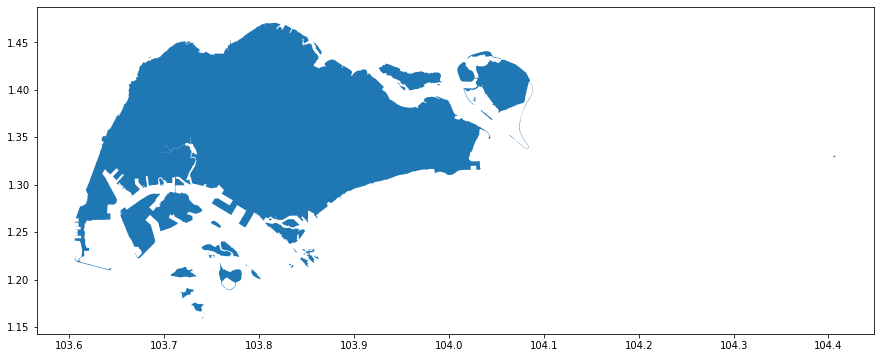

In [27]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


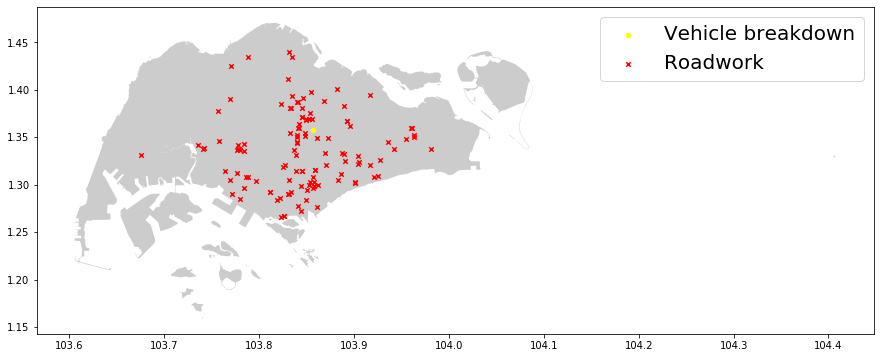

In [28]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df.Type == 'Vehicle breakdown'].plot(ax = ax, markersize = 20, color = 'yellow', marker = 'o', label='Vehicle breakdown')
geo_df[geo_df.Type == 'Roadwork'].plot(ax = ax, markersize = 20, color = 'red', marker = 'x', label='Roadwork')
geo_df[geo_df.Type == 'Heavy Traffic'].plot(ax = ax, markersize = 20, color = 'black', marker = 'o', label='Heavy Traffic')
plt.legend(prop={'size': 20})